In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Linear Regression 

Find the values of m and b in the $y = mx + b$ equation to minimize the cost function J
\begin{equation}
    J = \frac{1}{n} \sum (pred_i - y_i)^2
\end{equation}

Internally, the algorithm uses partial derivatives to update the values of m and b in each iterative step in order to reach the minimum cost (see Gradient Descent below).

Some of the original data is hidden from the linear regression model calculation, this hidden data will be used for testing the accuracy of the model.

__Example description__: Predict the beer consumption based on temperature, precipitation and whether it is a weekend or not

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467
364,2015-12-31,24.76,20.2,29.0,0.0,0.0,22.446


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

0.5902179933494862

,y_predicted,y_test
0,31747.157480,27518.0
1,18998.458732,16956.0
2,18781.863556,20452.0
3,20363.165937,20300.0
4,22327.856459,23198.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2035a3f320>,
      dtype=object)

array([2964.21837539, -608.70051879, 2345.50926833])

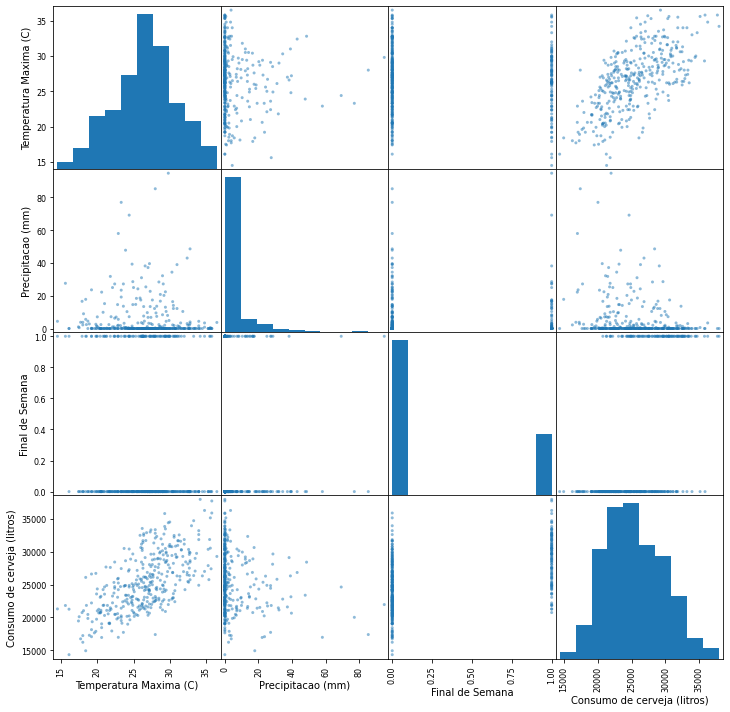

In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv("Consumo_cerveja.csv", decimal=',')
df.dropna(inplace=True)    # Removing blank spaces
df.tail()
df["Consumo de cerveja (litros)"] = pd.to_numeric(df["Consumo de cerveja (litros)"]) * 1000 # Converting string to float
df = df[["Temperatura Maxima (C)","Precipitacao (mm)","Final de Semana", "Consumo de cerveja (litros)"]]


X = np.array(df.drop(["Consumo de cerveja (litros)"],1))
y = np.array(df["Consumo de cerveja (litros)"])
X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.20) # Splitting datasets

clf = LinearRegression(normalize=True)
clf.fit(X_train, y_train)
R = clf.score(X_test, y_test)    # Testing accuracy
R

y_predicted = clf.predict(X_test)

newdict = {"y_predicted":y_predicted, "y_test": y_test}
new = pd.DataFrame(newdict)               # Table with original and predicted values           
new.head()

pd.plotting.scatter_matrix(df,figsize=(12,12))

#np.corrcoef(X,y)

clf.coef_

In the above example there is more than one feature, in this case the equation becomes $y=m_1x_1 + m_2x_2 + ... + m_nx_n + b$

__Internals of the Linear Regression__

For the best fit slope, we have:

\begin{equation}
    m = \frac{\sum (X-\overline{X})(Y - \overline{Y})}{ \sum (X-\overline{X})^2 }
\end{equation}

\begin{equation}
    b = \overline{Y} - m\overline{X}
\end{equation}

\begin{equation}
    R^2 = \frac{\sum (y_p - \overline{y})^2}{\sum (y - \overline{y})^2} 
\end{equation}

R² =  0.5844155844155842


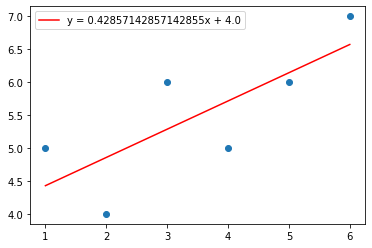

In [9]:
x = np.array([1,2,3,4,5,6])
y = np.array([5,4,6,5,6,7])

mean_y = np.mean(y)
mean_x = np.mean(x)

m = np.sum((x - mean_x)*(y - mean_y)) / np.sum((x - mean_x)**2)
b = mean_y - m*mean_x

ypred = m*x + b
Rxy = np.sum((ypred - mean_y)**2)/ np.sum((y-mean_y)**2)

plt.scatter(x,y)
plt.plot(x, ypred, color = 'red')
plt.legend(['y = {}x + {}'.format(m,b)])

print('R² = ', Rxy)